# Exploring Relationships: SAT Test Rates

## Contents:
1. Imports
2. School rates
3. District rates
4. County rates
5. Summary
6. Exports

### 1. Imports

In [1]:
# Import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Defining path and importing df

path = r'C:\Users\walls\Documents\Coding\Data Analysis\CareerFoundry\Data Immersion A6\CA SAT Analysis'
df_schools = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'SAT_Report_Schools.csv'), index_col = False)
df_district = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'SAT_Report_Districts 2.csv'), index_col = False)
df_county = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'SAT_Report_County 2.csv'), index_col = False)

In [3]:
df_schools.shape

(1252, 14)

In [4]:
df_schools.head()

,index,cds_code,record_type,school,district,county,enroll12,test_takers,avg_scr_read,avg_scr_math,avg_scr_writ,scr>1500,percentage,year
0,3,1.100170e+12,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,88,92,391,376,386,5,5.43,FY16
1,5,1.611190e+12,S,Alameda Science and Technology Institute,Alameda Unified,Alameda,37,35,572,612,530,30,85.71,FY16
2,7,1.611190e+12,S,Alameda High,Alameda Unified,Alameda,381,255,539,562,533,180,70.59,FY16
3,8,1.611190e+12,S,Alameda Community Learning Center,Alameda Unified,Alameda,52,46,538,539,516,30,65.22,FY16
4,9,1.611190e+12,S,Alternatives in Action,Alameda Unified,Alameda,31,17,366,365,359,0,0.00,FY16


In [5]:
df_district.shape

(421, 14)

In [6]:
df_district.head()

,index,cds_code,record_type,school,district,county,enroll12,test_takers,avg_scr_read,avg_scr_math,avg_scr_writ,scr>1500,percentage,year
0,2,1.100170e+12,D,NaN,Alameda County Office of Education,Alameda,263,95,395,378,388,6,6.32,FY16
1,4,1.611190e+12,D,NaN,Alameda Unified,Alameda,858,472,527,543,514,301,63.77,FY16
2,11,1.611270e+12,D,NaN,Albany City Unified,Alameda,300,179,585,607,575,148,82.68,FY16
3,13,1.611430e+12,D,NaN,Berkeley Unified,Alameda,922,542,561,559,553,357,65.87,FY16
4,16,1.611500e+12,D,NaN,Castro Valley Unified,Alameda,789,411,535,558,531,264,64.23,FY16


In [7]:
df_county.shape

(47, 14)

In [8]:
df_county.head()

,index,cds_code,record_type,school,district,county,enroll12,test_takers,avg_scr_read,avg_scr_math,avg_scr_writ,scr>1500,percentage,year
0,89,3.000000e+12,C,NaN,NaN,Amador,326,88,534,525,510,58,65.91,FY16
1,95,4.000000e+12,C,NaN,NaN,Butte,2445,694,508,522,490,375,54.03,FY16
2,119,5.000000e+12,C,NaN,NaN,Calaveras,498,130,512,515,499,70,53.85,FY16
3,126,6.000000e+12,C,NaN,NaN,Colusa,356,109,454,461,451,29,26.61,FY16
4,193,8.000000e+12,C,NaN,NaN,Del Norte,372,54,475,493,456,20,37.04,FY16


### 2. School Rates

In [15]:
# Create a numeric only subset

numeric_school = df_schools.select_dtypes(include=[np.number])

# Remove index column and cds_code (irrelevant data)

numeric_school = numeric_school.drop(['cds_code', 'index', 'percentage'], axis=1)

In [16]:
numeric_school.head()

,enroll12,test_takers,avg_scr_read,avg_scr_math,avg_scr_writ,scr>1500
0,88,92,391,376,386,5
1,37,35,572,612,530,30
2,381,255,539,562,533,180
3,52,46,538,539,516,30
4,31,17,366,365,359,0


In [17]:
# Create test-taking rates variable

school_rate = numeric_school['test_takers']/numeric_school['enroll12']

In [20]:
school_rate.describe()

count    1252.000000
mean             inf
std              NaN
min         0.032815
25%         0.405099
50%         0.515332
75%         0.659810
max              inf
dtype: float64

In [21]:
# Checking about inf values 

inf_rows = np.isinf(school_rate)

In [22]:
inf_rows.sum()

4

In [24]:
numeric_school[np.isinf(school_rate)]

,enroll12,test_takers,avg_scr_read,avg_scr_math,avg_scr_writ,scr>1500
368,0,27,353,348,358,0
469,0,116,397,382,390,10
1064,0,78,543,527,515,47
1150,0,54,446,444,436,10


##### Observations:
There are 0 enrolled for 4 schools, but 20+ test takers. 
These could be home-school students have to register with local schools.

Unsure, so will omit the 4 schools with 0 enrolled

In [28]:
# Removing 4 inf values

numeric_school_cleaned = numeric_school[~((numeric_school['enroll12'] == 0) & (numeric_school['test_takers'] > 0))]

In [29]:
school_rate2 = numeric_school_cleaned['test_takers']/numeric_school_cleaned['enroll12']

In [31]:
school_rate2.describe()

count    1248.000000
mean        0.549560
std         0.217702
min         0.032815
25%         0.404644
50%         0.515152
75%         0.659104
max         3.264706
dtype: float64

In [32]:
# Checking 326% values... 

valid_rows = numeric_school_cleaned['test_takers'] <= numeric_school_cleaned['enroll12'] # Creating condition to remove rows with more test takers than enrolled

In [33]:
numeric_school_cleaned2 = numeric_school_cleaned[valid_rows] # removing greater than values from test_rate_cleaned

In [34]:
school_rate3 = numeric_school_cleaned2['test_takers']/numeric_school_cleaned2['enroll12']

In [35]:
school_rate3.describe()

count    1217.000000
mean        0.534741
std         0.188981
min         0.032815
25%         0.401993
50%         0.509464
75%         0.645078
max         1.000000
dtype: float64

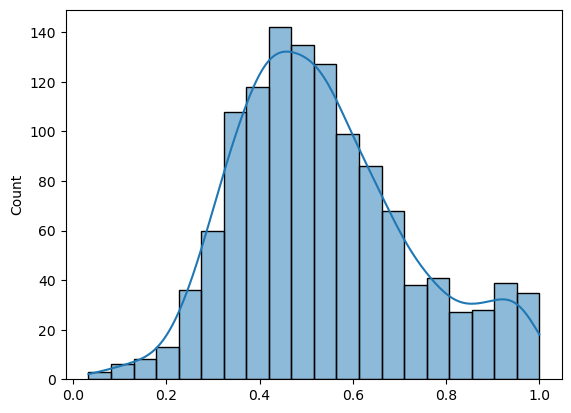

In [43]:
histogram = sns.histplot(data = school_rate3, bins = 20, kde = True) # Create a histogram based on school test rates

In [39]:
df_schools['Test Rates'] = school_rate3

In [40]:
df_schools.head()

,index,cds_code,record_type,school,district,county,enroll12,test_takers,avg_scr_read,avg_scr_math,avg_scr_writ,scr>1500,percentage,year,Test Rates
0,3,1.100170e+12,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,88,92,391,376,386,5,5.43,FY16,NaN
1,5,1.611190e+12,S,Alameda Science and Technology Institute,Alameda Unified,Alameda,37,35,572,612,530,30,85.71,FY16,0.945946
2,7,1.611190e+12,S,Alameda High,Alameda Unified,Alameda,381,255,539,562,533,180,70.59,FY16,0.669291
3,8,1.611190e+12,S,Alameda Community Learning Center,Alameda Unified,Alameda,52,46,538,539,516,30,65.22,FY16,0.884615
4,9,1.611190e+12,S,Alternatives in Action,Alameda Unified,Alameda,31,17,366,365,359,0,0.00,FY16,0.548387


##### Create categories based on school rates

In [110]:
df_schools.loc[df_schools['Test Rates'] < 0.3, 'Enroll Category'] = 'Low enrollment'
df_schools.loc[(df_schools['Test Rates'] >= .3) & (df_schools['Test Rates'] < .6), 'Enroll Category'] = 'Average enrollment'
df_schools.loc[df_schools['Test Rates'] >= .6, 'Enroll Category'] = 'High enrollment'

In [111]:
df_schools['Enroll Category'].value_counts(dropna = False)

Enroll Category
Average enrollment    731
High enrollment       391
Low enrollment         95
NaN                    35
Name: count, dtype: int64

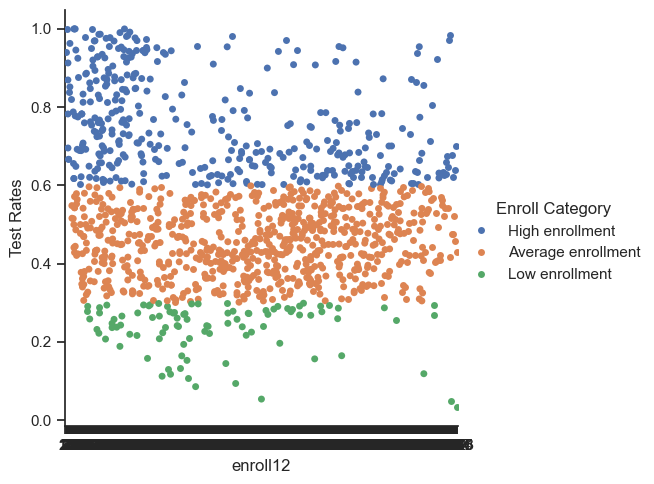

In [112]:
sns.set(style="ticks")
school_plot = sns.catplot(x="enroll12", y="Test Rates", hue="Enroll Category", data=df_schools)
plt.show()

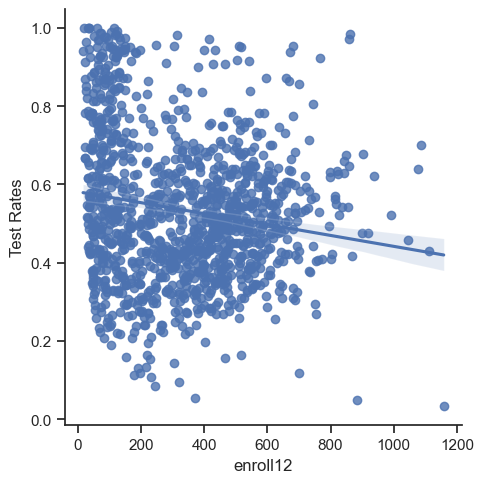

In [113]:
scatterplot = sns.lmplot(x = 'enroll12', y = 'Test Rates', data = df_schools)

### 3. District Rates

In [57]:
# Create a numeric only subset

numeric_district = df_district.select_dtypes(include=[np.number])

# Remove index column and cds_code (irrelevant data)

numeric_district = numeric_district.drop(['cds_code', 'index', 'percentage'], axis=1)

In [58]:
numeric_district.head()

,school,enroll12,test_takers,avg_scr_read,avg_scr_math,avg_scr_writ,scr>1500
0,NaN,263,95,395,378,388,6
1,NaN,858,472,527,543,514,301
2,NaN,300,179,585,607,575,148
3,NaN,922,542,561,559,553,357
4,NaN,789,411,535,558,531,264


In [59]:
# Remove "school"

numeric_district.drop(['school'], axis=1, inplace=True)

In [60]:
numeric_district.head()

,enroll12,test_takers,avg_scr_read,avg_scr_math,avg_scr_writ,scr>1500
0,263,95,395,378,388,6
1,858,472,527,543,514,301
2,300,179,585,607,575,148
3,922,542,561,559,553,357
4,789,411,535,558,531,264


In [61]:
# Create test-taking rates variable

district_rate = numeric_district['test_takers']/numeric_district['enroll12']

In [62]:
district_rate.describe()

count    421.000000
mean       0.410546
std        0.168582
min        0.022505
25%        0.312217
50%        0.395000
75%        0.495825
max        1.068376
dtype: float64

In [63]:
# Checking 106% values... 

valid_district_rows = numeric_district['test_takers'] <= numeric_district['enroll12'] # Creating condition to remove rows with more test takers than enrolled

In [64]:
numeric_district_cleaned = numeric_district[valid_district_rows] # removing greater than values

In [65]:
district_rate2 = numeric_district_cleaned['test_takers']/numeric_district_cleaned['enroll12']

In [66]:
district_rate2.describe()

count    418.000000
mean       0.406064
std        0.160601
min        0.022505
25%        0.311815
50%        0.394544
75%        0.489486
max        0.983333
dtype: float64

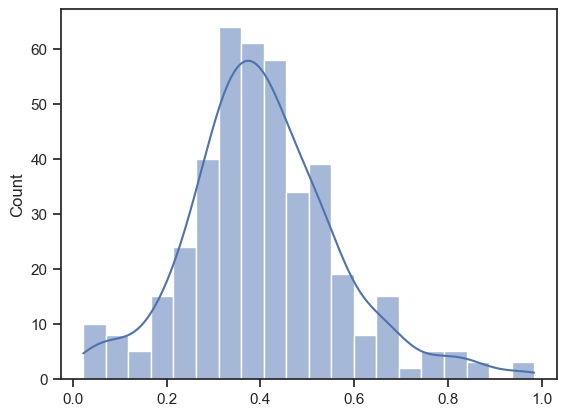

In [70]:
district_histogram = sns.histplot(data = district_rate2, bins = 20, kde = True) # Create a histogram based on district test rates

In [71]:
df_district['Test Rates'] = district_rate2

In [72]:
df_district.head()

,index,cds_code,record_type,school,district,county,enroll12,test_takers,avg_scr_read,avg_scr_math,avg_scr_writ,scr>1500,percentage,year,Test Rates
0,2,1.100170e+12,D,NaN,Alameda County Office of Education,Alameda,263,95,395,378,388,6,6.32,FY16,0.361217
1,4,1.611190e+12,D,NaN,Alameda Unified,Alameda,858,472,527,543,514,301,63.77,FY16,0.550117
2,11,1.611270e+12,D,NaN,Albany City Unified,Alameda,300,179,585,607,575,148,82.68,FY16,0.596667
3,13,1.611430e+12,D,NaN,Berkeley Unified,Alameda,922,542,561,559,553,357,65.87,FY16,0.587852
4,16,1.611500e+12,D,NaN,Castro Valley Unified,Alameda,789,411,535,558,531,264,64.23,FY16,0.520913


##### Create categories based on district test rates

In [77]:
df_district.loc[df_district['Test Rates'] < 0.3, 'Enroll Category'] = 'Low enrollment'
df_district.loc[(df_district['Test Rates'] >= .3) & (df_district['Test Rates'] < .6), 'Enroll Category'] = 'Average enrollment'
df_district.loc[df_district['Test Rates'] >= .6, 'Enroll Category'] = 'High enrollment'

In [78]:
df_district['Enroll Category'].value_counts(dropna = False)

Enroll Category
Average enrollment    287
Low enrollment         90
High enrollment        41
NaN                     3
Name: count, dtype: int64

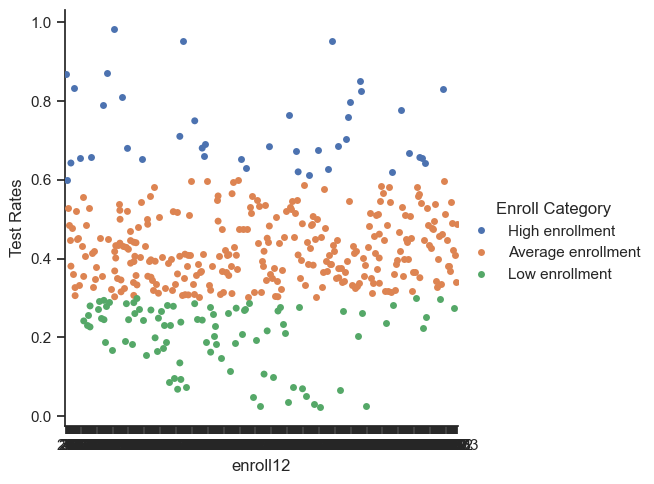

In [80]:
sns.set(style="ticks")
district_plot = sns.catplot(x="enroll12", y="Test Rates", hue="Enroll Category", data=df_district)
plt.show()

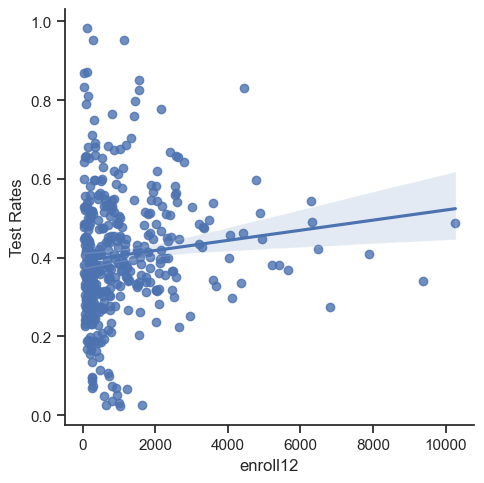

In [81]:
disctrict_scatterplot = sns.lmplot(x = 'enroll12', y = 'Test Rates', data = df_district)

### 4. County Rates

In [96]:
# Create a numeric only subset

numeric_county = df_county.select_dtypes(include=[np.number])

In [97]:
numeric_county.head()

,index,cds_code,school,district,enroll12,test_takers,avg_scr_read,avg_scr_math,avg_scr_writ,scr>1500,percentage
0,89,3.000000e+12,NaN,NaN,326,88,534,525,510,58,65.91
1,95,4.000000e+12,NaN,NaN,2445,694,508,522,490,375,54.03
2,119,5.000000e+12,NaN,NaN,498,130,512,515,499,70,53.85
3,126,6.000000e+12,NaN,NaN,356,109,454,461,451,29,26.61
4,193,8.000000e+12,NaN,NaN,372,54,475,493,456,20,37.04


In [98]:
numeric_county.drop(['cds_code', 'index', 'percentage', 'school', 'district'], axis=1, inplace=True)

In [99]:
numeric_county.head()

,enroll12,test_takers,avg_scr_read,avg_scr_math,avg_scr_writ,scr>1500
0,326,88,534,525,510,58
1,2445,694,508,522,490,375
2,498,130,512,515,499,70
3,356,109,454,461,451,29
4,372,54,475,493,456,20


In [101]:
# Create test-taking rates variable

county_rate = numeric_county['test_takers']/numeric_county['enroll12']

In [102]:
county_rate.describe()

count    47.000000
mean      0.319260
std       0.105271
min       0.082631
25%       0.268319
50%       0.319677
75%       0.365267
max       0.584572
dtype: float64

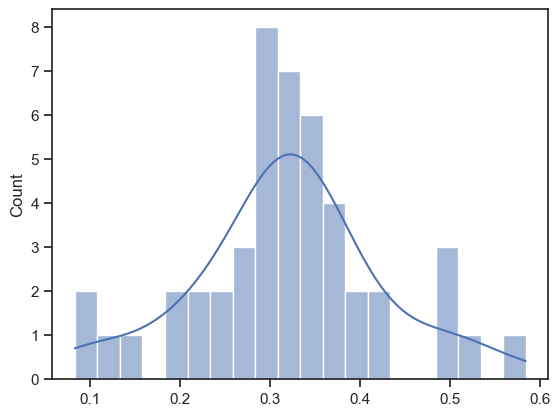

In [103]:
county_histogram = sns.histplot(data = county_rate, bins = 20, kde = True) # Create a histogram based on county test rates

In [104]:
df_county['Test Rates'] = county_rate

##### Create categories based on county test rates

In [106]:
df_county.loc[df_county['Test Rates'] < 0.29, 'Enroll Category'] = 'Low enrollment'
df_county.loc[(df_county['Test Rates'] >= .29) & (df_county['Test Rates'] < .39), 'Enroll Category'] = 'Average enrollment'
df_county.loc[df_county['Test Rates'] >= .39, 'Enroll Category'] = 'High enrollment'

In [107]:
df_county['Enroll Category'].value_counts(dropna = False)

Enroll Category
Average enrollment    23
Low enrollment        15
High enrollment        9
Name: count, dtype: int64

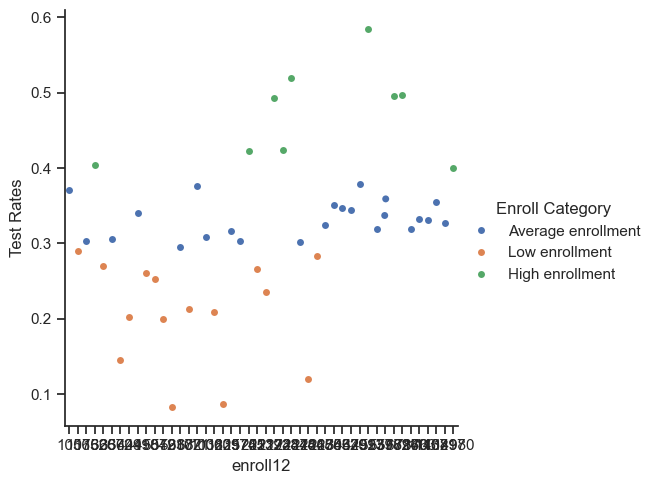

In [108]:
sns.set(style="ticks")
county_plot = sns.catplot(x="enroll12", y="Test Rates", hue="Enroll Category", data=df_county)
plt.show()

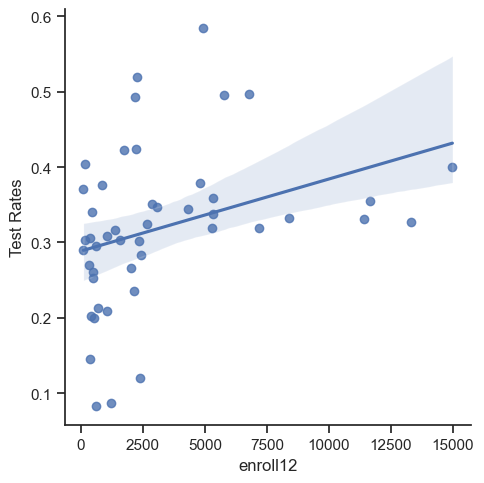

In [109]:
county_scatterplot = sns.lmplot(x = 'enroll12', y = 'Test Rates', data = df_county)

### 5. Summary

### 6. Exports

In [114]:
#Exporting df

df_schools.to_csv(os.path.join(path, 'Data','Prepared Data', 'SAT_Report_School Rates.csv'))

df_district.to_csv(os.path.join(path, 'Data','Prepared Data', 'SAT_Report_District Rates.csv'))

df_county.to_csv(os.path.join(path, 'Data','Prepared Data', 'SAT_Report_County Rates.csv'))

In [115]:
# Export school viz

histogram.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'school rates.png'))
school_plot.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'school rate plot.png'))
scatterplot.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'school rates plot.png'))

In [117]:
# Export district viz

district_histogram.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'district rates.png'))
district_plot.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'district rate plot.png'))
disctrict_scatterplot.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'district rates plot.png'))

In [118]:
# Export county viz 

county_histogram.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'county rates.png'))
county_plot.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'county rate plot.png'))
county_scatterplot.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'county rates plot.png'))